In [4]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
a=[1.311,2.617,3.623,5.001,6.285,7.589,8.640,9.927,11.026,12.283,13.486,14.705,15.808,16.975,18.098,
  19.572,20.610,21.944,22.897,24.139,25.505,26.587,27.859,29.060,30.176,31.318,32.640,33.721,34.974,36.124,
  37.521,38.666]
b=pd.date_range('2020-01-01',periods=32)
series=pd.Series(a)
len(series)
model = ARIMA(a, order=(1,0,0))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   32
Model:                     ARMA(1, 0)   Log Likelihood                 -54.249
Method:                       css-mle   S.D. of innovations              1.211
Date:                Thu, 07 Jan 2021   AIC                            114.497
Time:                        19:21:27   BIC                            118.894
Sample:                             0   HQIC                           115.955
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9899     17.970      1.112      0.266     -15.231      55.210
ar.L1.y        0.9978      0.003    319.326      0.000       0.992       1.004
                                    Roots           

In [6]:
model = ARIMA(a, order=(1,1,0))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   31
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  26.923
Method:                       css-mle   S.D. of innovations              0.101
Date:                Thu, 07 Jan 2021   AIC                            -47.846
Time:                        19:21:28   BIC                            -43.544
Sample:                             1   HQIC                           -46.444
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2045      0.012    102.953      0.000       1.182       1.227
ar.L1.D.y     -0.5673      0.144     -3.928      0.000      -0.850      -0.284
                                    Roots           

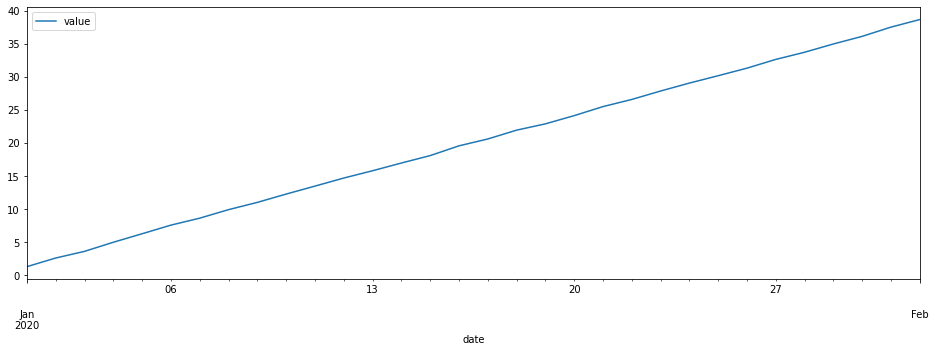

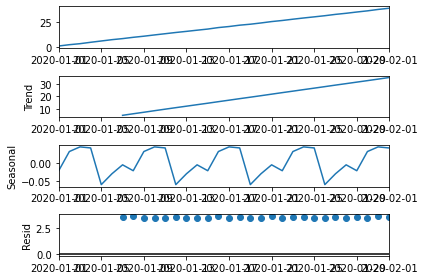

<Figure size 432x288 with 0 Axes>

In [7]:
df=pd.DataFrame({"date":b,"value":a})
df=df.set_index('date')
df.plot(figsize=(16,5))
result=seasonal_decompose(df,model='additive',two_sided=False)
result.plot()
plt.figure()
plt.show()
df_re=pd.concat([result.observed, result.trend, result.seasonal, result.resid],axis=1)
df_re.columns=['obs','trend','seasonal','resid']
df_re.dropna(inplace=True)
df_re.head(24)
df_re['year']=df_re.index.year

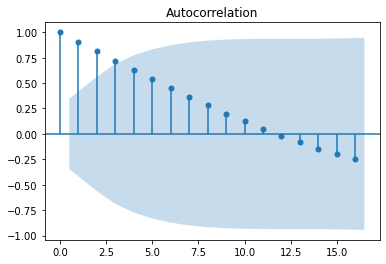

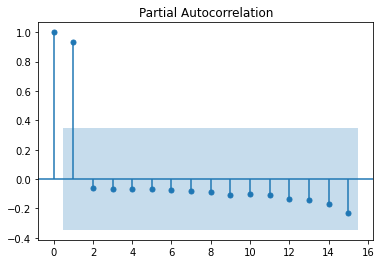

In [8]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df)
plt.show()
plot_pacf(df,lags=15)
plt.show()

In [9]:
model=ARIMA(df, order=(4,1,2))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   31
Model:                 ARIMA(4, 1, 2)   Log Likelihood                  31.332
Method:                       css-mle   S.D. of innovations              0.075
Date:                Thu, 07 Jan 2021   AIC                            -46.665
Time:                        19:22:33   BIC                            -35.193
Sample:                    01-02-2020   HQIC                           -42.925
                         - 02-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1978      0.001   1002.498      0.000       1.195       1.200
ar.L1.D.value     0.7984      0.266      3.004      0.003       0.277       1.319
ar.L2.D.value     0.1100      0.213     

In [10]:
from statsmodels.formula.api import ols
df=pd.DataFrame({"date":range(32),"value":a})
res = ols('date~value', data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   date   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.800e+05
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           1.25e-64
Time:                        19:22:59   Log-Likelihood:                 38.352
No. Observations:                  32   AIC:                            -72.70
Df Residuals:                      30   BIC:                            -69.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1914      0.028    -43.275      0.0

In [16]:
b=pd.date_range('2020-01-01',periods=8)
df=pd.DataFrame({"date":b,"value":[6.8,5.1,3.8,2.8,2.1,1.6,1.2,0.9]})
df=df.set_index('date')
df.head()


,value
date,
2020-01-01,6.8
2020-01-02,5.1
2020-01-03,3.8
2020-01-04,2.8
2020-01-05,2.1


<AxesSubplot:xlabel='date'>

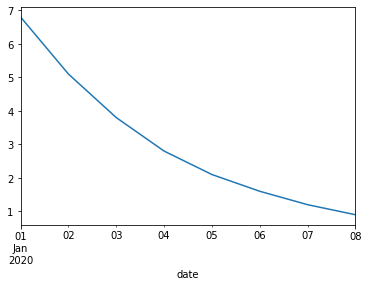

In [17]:
df.value.plot()

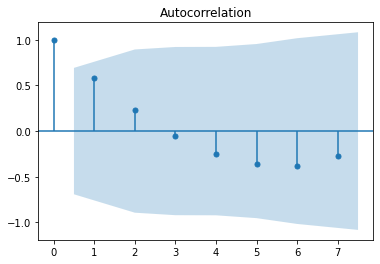

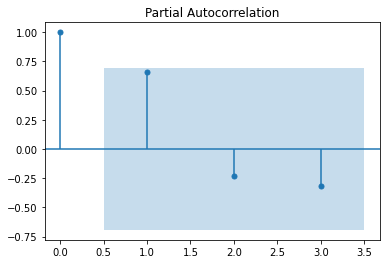

In [19]:
plot_acf(df)
plt.show()
plot_pacf(df,lags=3)
plt.show()

In [87]:
model=ARMA([6.8,5.1,3.8,2.8,2.1,1.6,1.2,0.9], order=(1,0))
print(model)

In [91]:
model_fit = model.fit(trend='c',disp=1)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                    8
Model:                     ARMA(1, 0)   Log Likelihood                 -12.046
Method:                       css-mle   S.D. of innovations              0.961
Date:                Thu, 07 Jan 2021   AIC                             30.091
Time:                        20:16:30   BIC                             30.330
Sample:                             0   HQIC                            28.484
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6657      2.378      1.542      0.123      -0.995       8.326
ar.L1.y        0.9317      0.095      9.807      0.000       0.745       1.118
                                    Roots           